<a href="https://colab.research.google.com/github/skyish21/VOIS_AICTE_Oct2025_MajorProject_IshikaSharma/blob/main/Netflix_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For clean visuals
plt.style.use('seaborn-v0_8')
sns.set_palette("pastel")

In [2]:
# Upload Netflix dataset (CSV) and Load dataset
df = pd.read_csv('/content/Netflix Dataset 1.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.tail()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [4]:
# Basic info
print("Dataset Shape:", df.shape)

Dataset Shape: (7789, 11)


In [5]:
print("\nColumn Names:\n")
df.columns.to_frame(0)


Column Names:



,0
0,Show_Id
1,Category
2,Title
3,Director
4,Cast
5,Country
6,Release_Date
7,Rating
8,Duration
9,Type


In [6]:
print("\nMissing Values:\n")
df.isnull().sum()


Missing Values:



,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [7]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [8]:
df.describe(include='all').T

,count,unique,top,freq
Show_Id,7789,7787,s6621,2
Category,7789,2,Movie,5379
Title,7789,7787,The Lost Okoroshi,2
Director,5401,4050,"Raúl Campos, Jan Suter",18
Cast,7071,6831,David Attenborough,18
Country,7282,681,United States,2556
Release_Date,7779,1565,"January 1, 2020",118
Rating,7782,14,TV-MA,2865
Duration,7789,216,1 Season,1608
Type,7789,492,Documentaries,334


In [9]:
# Check duplicated values
df.duplicated().sum()

np.int64(2)

In [10]:
# View duplicated values
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [11]:
# See which titles are duplicated
dupes = df[df.duplicated(subset='Title', keep=False)].sort_values('Title')
dupes[['Show_Id', 'Title', 'Country', 'Release_Date']].head(10)

,Show_Id,Title,Country,Release_Date
683,s684,Backfire,United States,"April 5, 2019"
6300,s684,Backfire,United States,"April 5, 2019"
4839,s6621,The Lost Okoroshi,Nigeria,"September 4, 2020"
6622,s6621,The Lost Okoroshi,Nigeria,"September 4, 2020"


# Data Cleaning

In [12]:
# Fill missing values
df['Country'].fillna('Not available', inplace=True)
df['Director'].fillna('Not available', inplace=True)
df['Cast'].fillna('Not available', inplace=True)

/tmp/ipython-input-3830042232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Not available', inplace=True)
/tmp/ipython-input-3830042232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [13]:
# Convert 'Release_Date' to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [14]:
#df['Release_Date'].fillna(pd.Timestamp('2000-01-01'), inplace=True)
df.dropna(subset=['Release_Date'], inplace=True)
df['Rating'].fillna('Unknown', inplace=True)

/tmp/ipython-input-4156501667.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna('Unknown', inplace=True)


In [15]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,0
Rating,0
Duration,0
Type,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7691 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7691 non-null   object        
 1   Category      7691 non-null   object        
 2   Title         7691 non-null   object        
 3   Director      7691 non-null   object        
 4   Cast          7691 non-null   object        
 5   Country       7691 non-null   object        
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7691 non-null   object        
 8   Duration      7691 non-null   object        
 9   Type          7691 non-null   object        
 10  Description   7691 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 721.0+ KB


In [17]:
# Drop duplicated values
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

np.int64(0)

# Visualization

In [19]:
df['Category'].unique()

array(['TV Show', 'Movie'], dtype=object)

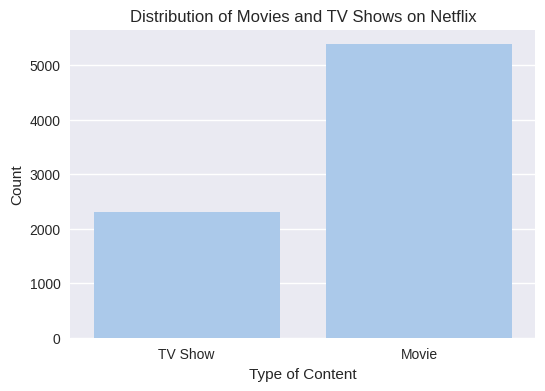

In [20]:
# Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category')
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()

In [21]:
# Percentage split
content_split = df['Category'].value_counts(normalize=True) * 100
print(content_split)

Category
Movie      69.93107
TV Show    30.06893
Name: proportion, dtype: float64


In [22]:
# Extract year from 'Release_Date'
df['Release_Year'] = df['Release_Date'].dt.year

In [23]:
# Count of content added per year by type
trend = df.groupby(['Release_Year', 'Category']).size().reset_index(name='count')
trend_table = trend.pivot(index='Release_Year', columns='Category', values='count').fillna(0).astype(int)

trend_table.T

Release_Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Category,,,,,,,,,,,,,,
Movie,1,2,1,13,3,6,19,58,258,864,1255,1497,1312,88
TV Show,1,0,0,0,0,4,5,21,174,337,406,639,696,29


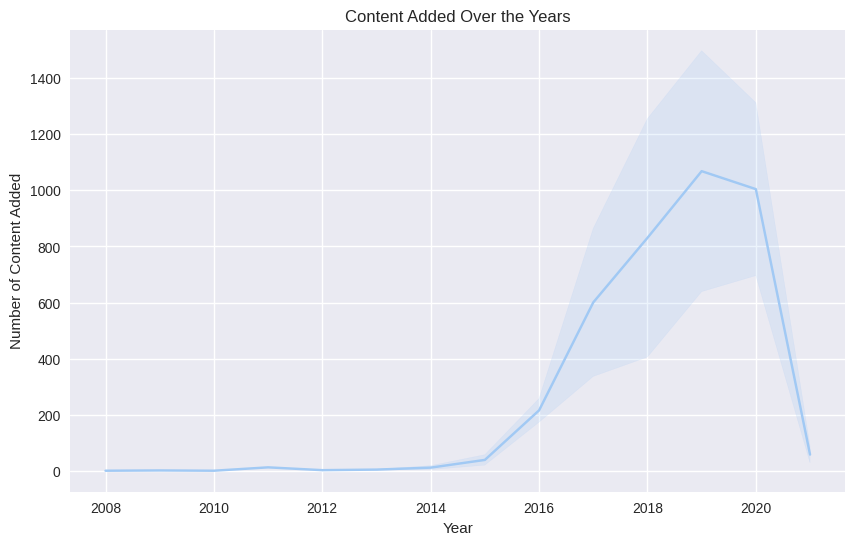

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(data=trend, x='Release_Year', y='count')
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Content Added')
plt.show()

In [25]:
# Split genres and explode into a separate Series
genres_series = df['Type'].str.split(',').explode().str.strip()

# Count genres
print('Number of Genre-specific content:\n\n')
genres_series.value_counts().to_frame().sort_values(ascending=False, by='count')

Number of Genre-specific content:




,count
Type,
International Movies,2437
Dramas,2106
Comedies,1471
International TV Shows,1176
Documentaries,786
Action & Adventure,721
TV Dramas,680
Independent Movies,673
Children & Family Movies,532


In [26]:
print('Number of unique genres:', genres_series.nunique())

Number of unique genres: 42


In [27]:
genres_top10 = genres_series.value_counts().head(10)
print(genres_top10)

Type
International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1176
Documentaries                786
Action & Adventure           721
TV Dramas                    680
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
Name: count, dtype: int64


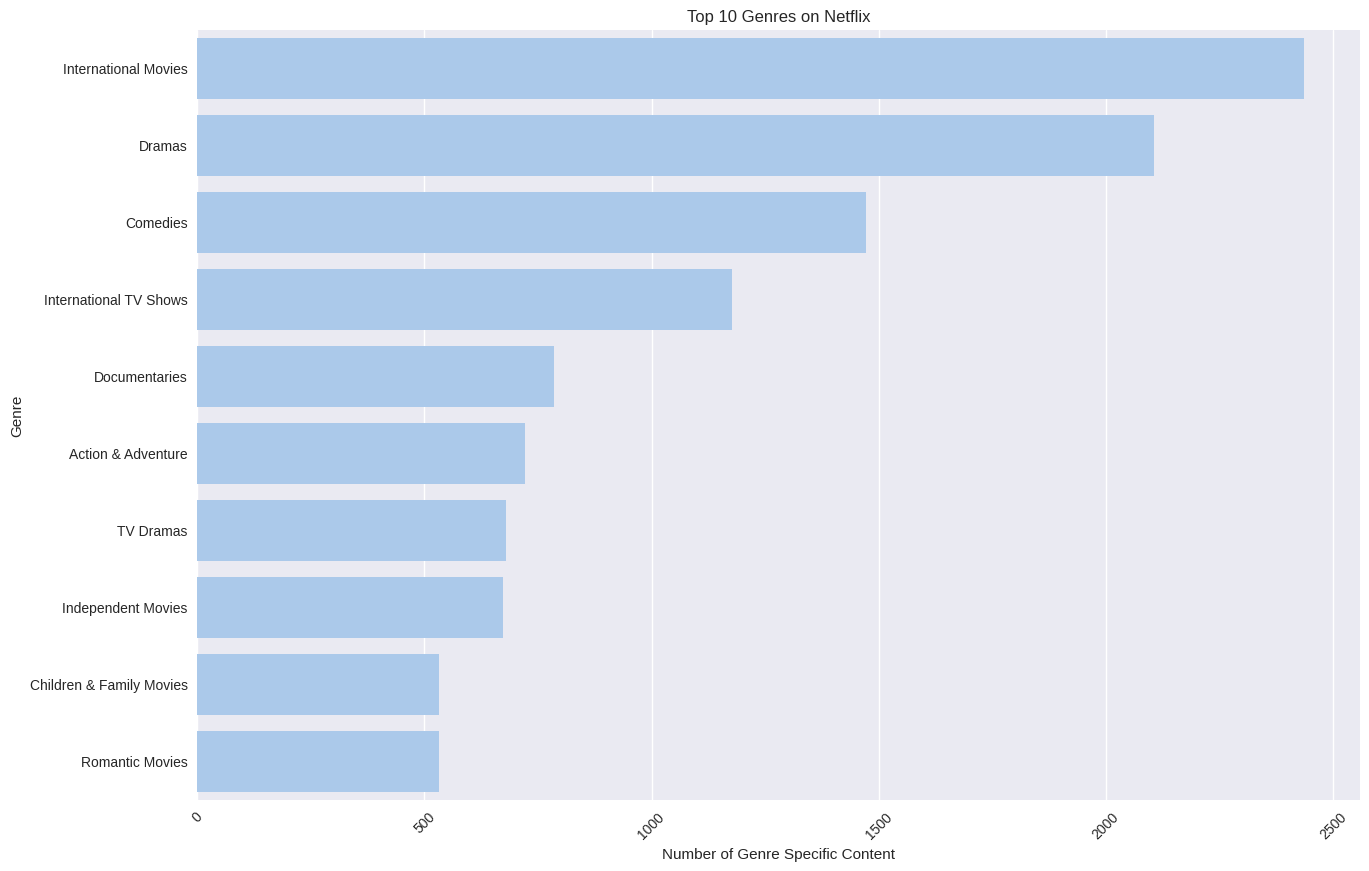

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x=genres_top10.values, y=genres_top10.index)
plt.title('Top 10 Genres on Netflix')
plt.xticks(rotation=45)
plt.xlabel('Number of Genre Specific Content')
plt.ylabel('Genre')
plt.show()

Insight: Reveals most frequent genres like International Movies, Dramas, Comedies etc.

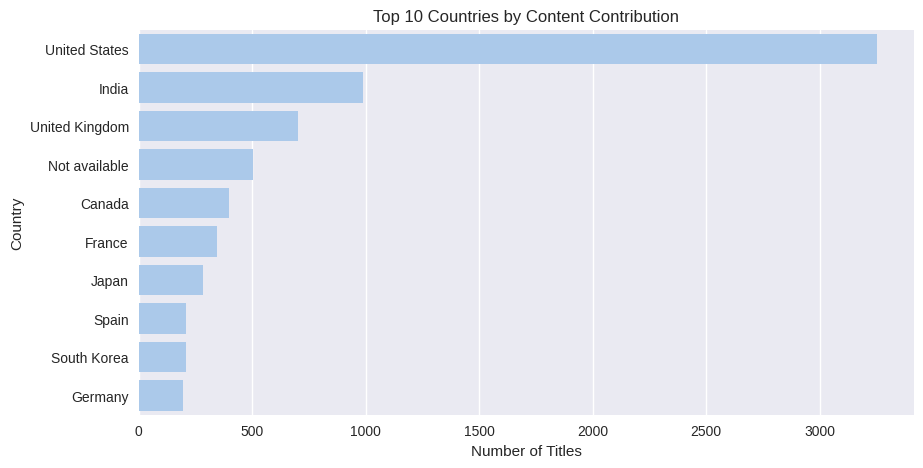

In [31]:
# Top 10 countries contributing content
country_counts = df['Country'].str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Content Contribution')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


Insight: Usually dominated by USA, India, UK, and Canada.

In [34]:
print("✅ Insights Summary:")
print("- Movies make up about {:.1f}% of total content, TV Shows about {:.1f}%.".format(
    content_split['Movie'], content_split['TV Show']))
print("- Netflix has been adding more content each year until around 2019, with a small drop afterward.")
print("- Top genres include:", ', '.join(genres_top10.index[:5]))
print("- Major content contributors are:", ', '.join(country_counts.index[:5]))
print("\n📌 Recommendation: Netflix can focus more on emerging genres and increase regional content diversity.")

✅ Insights Summary:
- Movies make up about 69.9% of total content, TV Shows about 30.1%.
- Netflix has been adding more content each year until around 2019, with a small drop afterward.
- Top genres include: International Movies, Dramas, Comedies, International TV Shows, Documentaries
- Major content contributors are: United States, India, United Kingdom, Not available, Canada

📌 Recommendation: Netflix can focus more on emerging genres and increase regional content diversity.


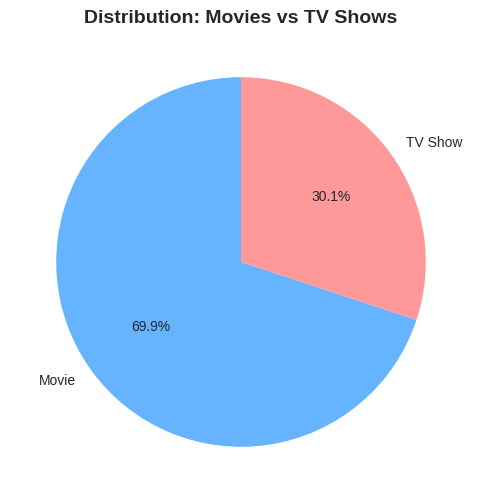

In [36]:
# Movies vs TV Shows Count
category_count = df['Category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution: Movies vs TV Shows', fontsize=14, weight='bold')
plt.show()

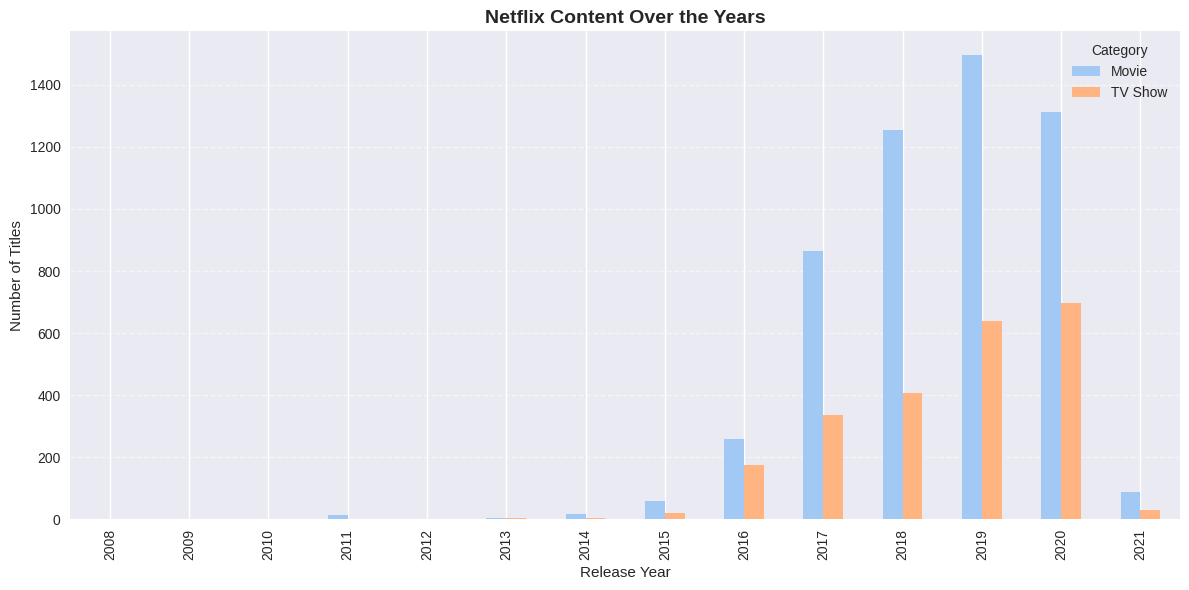

In [37]:
# Content Added Over the Years
df['Release_Year'] = df['Release_Date'].dt.year
year_wise = df.groupby(['Release_Year', 'Category']).size().unstack(fill_value=0)

year_wise.plot(kind='bar', figsize=(12,6))
plt.title('Netflix Content Over the Years', fontsize=14, weight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

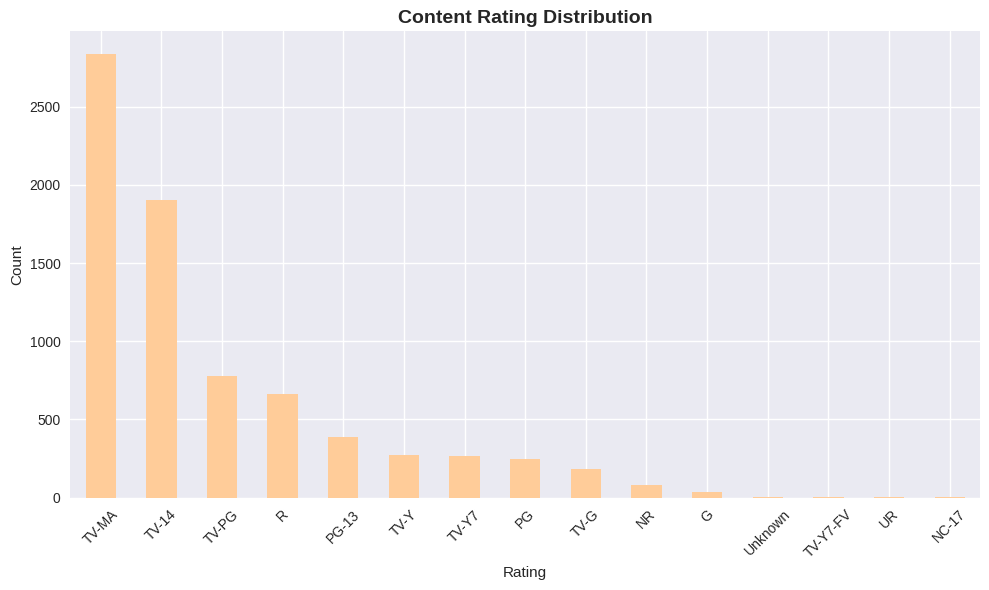

In [46]:
# Ratings Distribution
plt.figure(figsize=(10,6))
df['Rating'].value_counts().sort_values(ascending=False).plot(kind='bar', color='#ffcc99')
plt.title('Content Rating Distribution', fontsize=14, weight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Helps understand audience maturity levels — e.g. majority “TV-MA” or “TV-14”.

In [53]:
# World Map Heatmap — Country Contribution (Plotly Choropleth)
import plotly.express as px

# Clean up country data
country_df = df['Country'].value_counts().reset_index()
country_df.columns = ['Country', 'Count']

# Plot choropleth
fig = px.choropleth(
    country_df,
    locations='Country',
    locationmode='country names',
    color='Count',
    hover_name='Country',
    color_continuous_scale='Reds',
    title='🌍 Global Distribution of Netflix Titles by Country'
)
fig.update_layout(template='plotly_white')
fig.show()


Visualizes which countries contribute the most — e.g. USA, India, UK dominate.

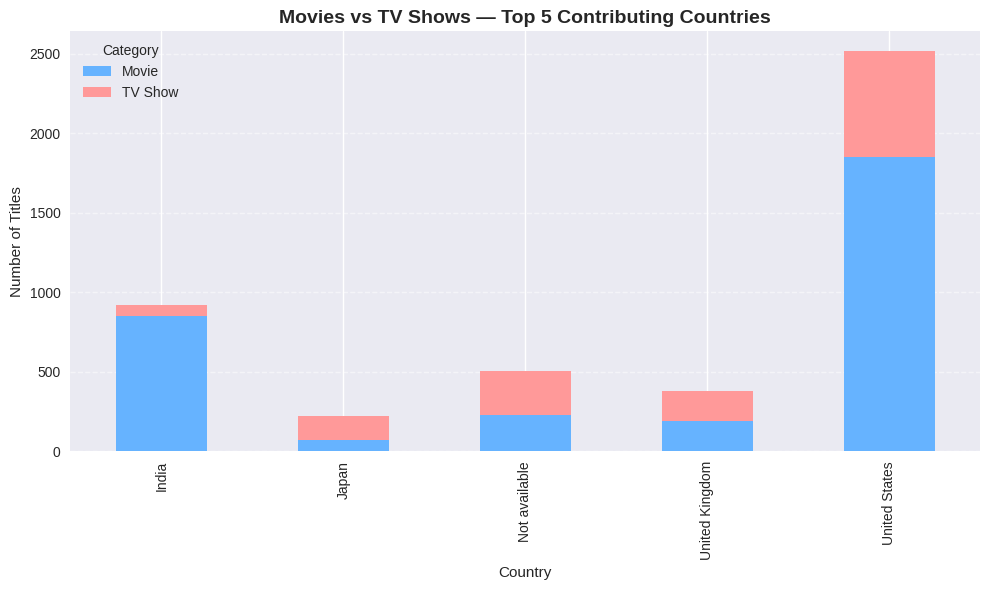

In [54]:
# Country vs Category — Stacked Bar Chart (Top 5 Countries)
top5 = df['Country'].value_counts().head(5).index
subset = df[df['Country'].isin(top5)]

country_category = subset.groupby(['Country','Category']).size().unstack(fill_value=0)

country_category.plot(kind='bar', stacked=True, figsize=(10,6), color=['#66b3ff','#ff9999'])
plt.title('Movies vs TV Shows — Top 5 Contributing Countries', fontsize=14, weight='bold')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [55]:
# Regional Genre Preferences — Top Genre per Country
from collections import Counter

# Split & explode genres
genres_exploded = df.assign(Genres=df['Type'].str.split(',')).explode('Genres')
genres_exploded['Genres'] = genres_exploded['Genres'].str.strip()

# Find top genre per country
top_genres_country = (
    genres_exploded.groupby('Country')['Genres']
    .apply(lambda x: Counter(x).most_common(1)[0][0] if len(x.dropna())>0 else None)
    .reset_index(name='Top_Genre')
)

fig = px.choropleth(
    top_genres_country,
    locations='Country',
    locationmode='country names',
    color='Top_Genre',
    title='🎭 Top Genre by Country',
)
fig.update_layout(template='plotly_white')
fig.show()

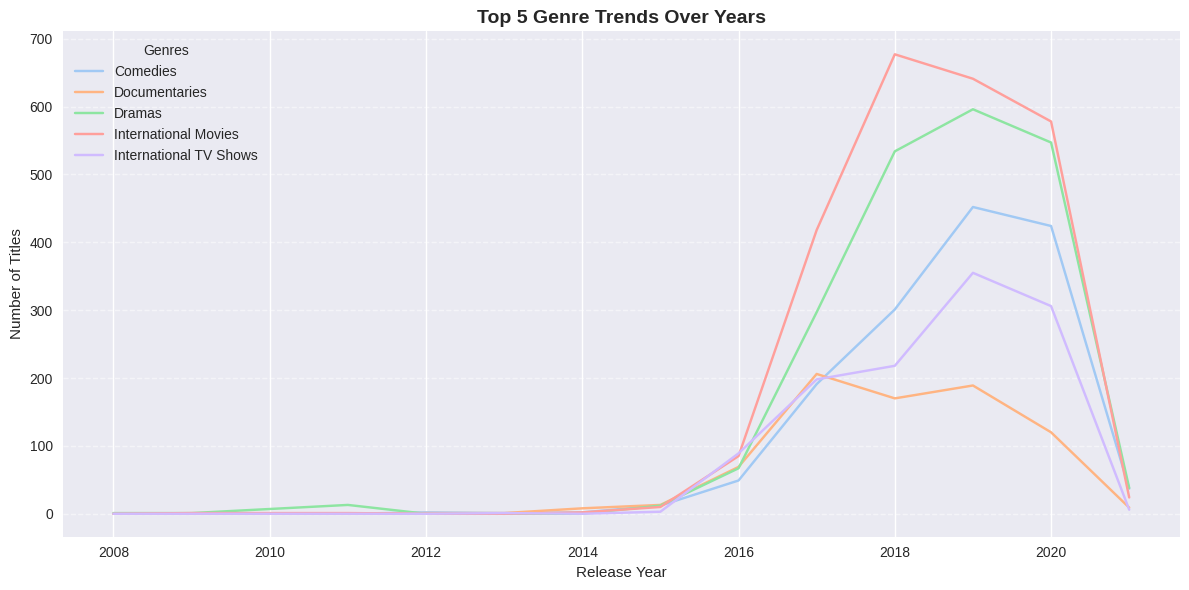

In [56]:
# Top genre trends over the years
top5_genres = genres_top10.index.tolist()[:5]
trend_df = genres_exploded[genres_exploded['Genres'].isin(top5_genres)]

trend_data = trend_df.groupby(['Release_Year','Genres']).size().unstack(fill_value=0)
trend_data.plot(figsize=(12,6))
plt.title('Top 5 Genre Trends Over Years', fontsize=14, weight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Shows evolution of genre popularity, especially after 2018

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9729 (\N{CLOUD}) missing from font(s) Liberation Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.



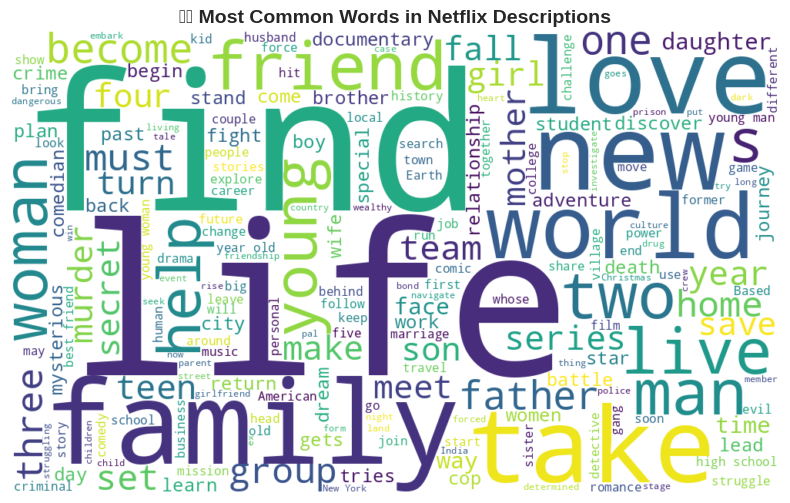

In [57]:
# Word Cloud — Genres or Descriptions
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all descriptions into a single string
text = " ".join(desc for desc in df['Description'].dropna())

# Create word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=600).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("☁️ Most Common Words in Netflix Descriptions", fontsize=14, weight='bold')
plt.show()

Reveals thematic focus like “Love”, “Family” etc.

### Stratergic/Business Insights concluded from above information represented below

In [62]:
# Most Represented Countries & Genres → Expansion Regions
top_countries = df['Country'].value_counts().head(10)
top_genres = genres_exploded['Genres'].value_counts().head(10)

insight_df = pd.DataFrame({
    'Top Countries': top_countries.index,
    'Titles Count': top_countries.values,
    'Top Genres': top_genres.index,
    'Genre Count': top_genres.values
})
display(insight_df)

,Top Countries,Titles Count,Top Genres,Genre Count
0,United States,2515,International Movies,2437
1,India,922,Dramas,2106
2,Not available,503,Comedies,1471
3,United Kingdom,381,International TV Shows,1176
4,Japan,222,Documentaries,786
5,South Korea,179,Action & Adventure,721
6,Canada,169,TV Dramas,680
7,Spain,130,Independent Movies,673
8,France,113,Children & Family Movies,532
9,Egypt,101,Romantic Movies,531


Use this to suggest “Netflix dominates USA/India in Dramas.

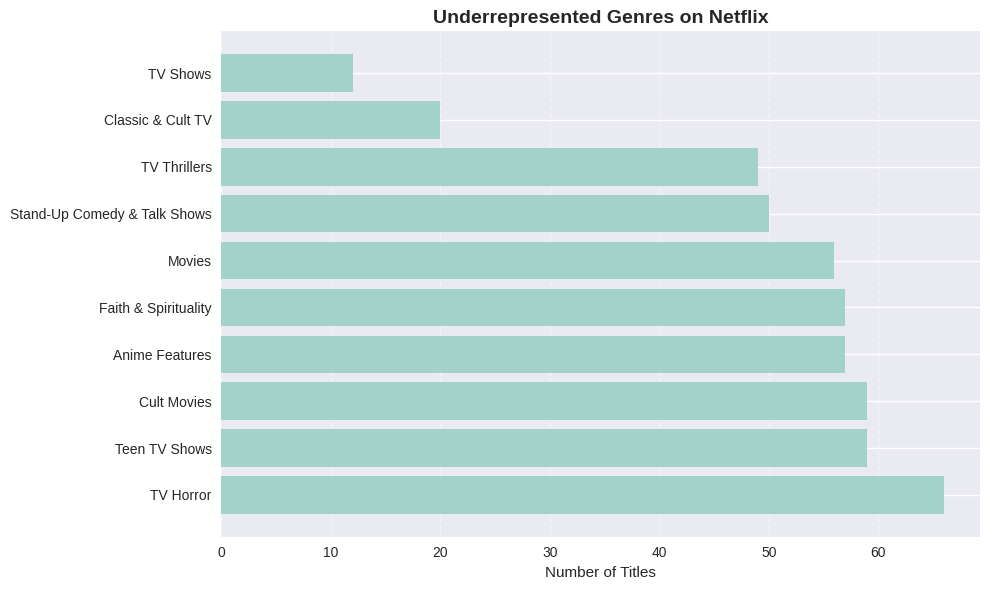

In [63]:
# Underrepresented Genres → Growth Opportunities
bottom_genres = genres_exploded['Genres'].value_counts().tail(10)
bottom_genres = bottom_genres[bottom_genres > 0]  # exclude empty

plt.figure(figsize=(10,6))
plt.barh(bottom_genres.index, bottom_genres.values, color='#a3d2ca')
plt.title('Underrepresented Genres on Netflix', fontsize=14, weight='bold')
plt.xlabel('Number of Titles')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Suggest genres with growth potential

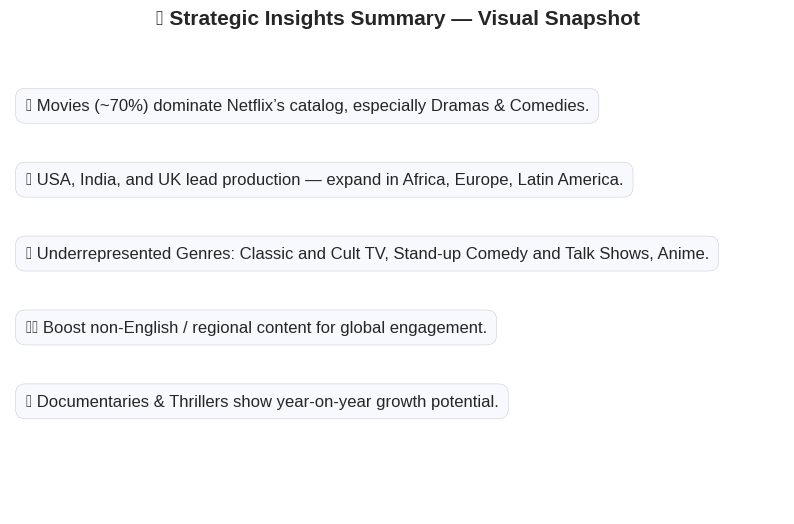

In [65]:
# Summary Recommendations

fig, ax = plt.subplots(figsize=(10,6))
ax.axis('off')

summary_points = [
    "🎬 Movies (~70%) dominate Netflix’s catalog, especially Dramas & Comedies.",
    "🌍 USA, India, and UK lead production — expand in Africa, Europe, Latin America.",
    "📉 Underrepresented Genres: Classic and Cult TV, Stand-up Comedy and Talk Shows, Anime.",
    "🗣️ Boost non-English / regional content for global engagement.",
    "📈 Documentaries & Thrillers show year-on-year growth potential."
]

for i, point in enumerate(summary_points):
    ax.text(0.02, 0.9 - i*0.16, point, fontsize=12, va='top', ha='left',
            bbox=dict(facecolor='#f8f8ff', edgecolor='#c0c0c0', boxstyle='round,pad=0.6'))

plt.title("📈 Strategic Insights Summary — Visual Snapshot", fontsize=15, weight='bold', pad=20)
plt.show()